# Credit Card Customer Segmentation

## About Dataset

This dataset is a collection of information related to customers and their credit card usage. It contains various features that provide insights into customer behavior, preferences, and credit card usage patterns.

The dataset includes 660 records and 7 columns, providing a wealth of information about the credit card customers.

By analyzing this data, we can gain valuable insights those can be used to identify Loyal Customers, Customer Segmentation, Targeted Marketing in the Marketing Industry.

## Data Dictionary

**Sl_No**

* Numerical
* This column represents the serial number or index assigned to each record in the dataset.

**Customer Key**

* Numerical
* This column contains a unique identifier assigned to each customer in the dataset.

**Avg_Credit_Limit**

* Numerical
* This column represents the average credit limit assigned to each customer, It indicates the average amount of credit that the customer is allowed to borrow or spend using their credit card.

**Total_Credit_Cards**

* Numerical
* This column denotes the total number of credit cards held by each customer.

**Total_visits_bank**

* Numerical
* This column represents the total number of visits made by each customer to a physical bank branch.

**Total_visits_online**

* Numerical
* This column denotes the total number of visits made by each customer to the online banking platform or website.

**Total_calls_made**

* Numerical
* This column represents the total number of calls made by each customer to the customer service or support center of the credit card company.



## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) for different customers of credit card.

## Load Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

## Load Dataset and Find Info

In [ ]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "Credit Card Customer Data.csv")

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# 1st 10 rows
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [ ]:
# Shape of Data
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 660
Number of columns: 7


#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [ ]:
cat_columns = []
num_columns = []
for col in df.columns:
  if df[col].dtype == "object":
    cat_columns.append(col)
  else:
    num_columns.append(col)
print(f"Categorical Columns: {len(cat_columns)}")
print(f"Categorical Columns: {cat_columns}")
print("-" * 60)
print(f"Numerical Columns: {len(num_columns)}")
print(f"Numerical Columns: {num_columns}")

Categorical Columns: 0
Categorical Columns: []
------------------------------------------------------------
Numerical Columns: 7
Numerical Columns: ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [ ]:
def missing_values(df):
  missing_cols = []
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(f"Number of missing values in {col}: {df[col].isnull().sum()}")
      missing_cols.append(col)
  return missing_cols

In [ ]:
missing_cols = missing_values(df)
if len(missing_cols) == 0:
  print("No missing values present in the dataset.")

No missing values present in the dataset.


### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here Sl_No and Customer Key columns are not needed for EDA or modeling as they are containing unique values, so they should be removed.

In [ ]:
df.drop(["Sl_No", "Customer Key"], axis=1, inplace=True)

### Get Statistics of data

This we help us to know about mean, median and distribution of each feature.

In [ ]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()
scaled = sc.fit_transform(df.values)

In [ ]:
scaled

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

## Clustering

### DBSCAN Clustering

Now we will determine the best epsilon and min Pts. parameters for DBSCAN using Silhouette score.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
eps_range = np.linspace(0.1, 10, 50)
min_pts_range = range(2, 10)

best_ep = eps_range[0]
best_min_pts = min_pts_range[0]
best_score = -1

for eps in eps_range:
  for mp in min_pts_range:
    model = DBSCAN(eps=eps, min_samples= mp)
    labels = model.fit_predict(scaled)
    if len(set(labels)) > 1:

      # Find the silhouette score
      score = silhouette_score(scaled, labels)
      if score > best_score:
        best_score = score
        best_ep = eps
        best_min_pts = mp

print(f"Best Epsilon: {best_ep}")
print(f"Best MinPts: {best_min_pts}")
print(f"Best Silhouette Score: {best_score}")

Best Epsilon: 0.9081632653061225
Best MinPts: 8
Best Silhouette Score: 0.556878551031131


### Observations:

We found highest silhouette score with epsilon value **0.9081632653061225** and min Pts. **8**. So we decided to train the clustering with these parameters.

In [ ]:
model = DBSCAN(eps= best_ep, min_samples= best_min_pts)
labels = model.fit_predict(scaled)


In [ ]:
# Add the labels to the dataset
df["cluster"] = labels

In [ ]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,100000,2,1,1,0,-1
1,50000,3,0,10,9,-1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,-1


In [ ]:
df["cluster"].value_counts().sort_index()

cluster
-1     53
 0    607
Name: count, dtype: int64

### Observations

The DBSCAN clustering detects the **53** outliers present in the dataset and all other **607** data are present in only one cluster.
Now we will apply KMeans clustering on data dataset removing those outliers for the segmentation of customers.

In [ ]:
df_cleaned = df[df["cluster"] == 0]

In [ ]:
df_cleaned.shape

(607, 6)

In [ ]:
# Drop the cluster column
df_cleaned.drop(["cluster"], axis=1, inplace= True)

<ipython-input-100-29ad78ae1578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(["cluster"], axis=1, inplace= True)


In [ ]:
df_cleaned.shape

(607, 5)

### K-Means Clustering

Now we will determine the best number of clusters for this dataset using Elbow method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Scale the data

scaled = sc.fit_transform(df_cleaned.values)

Text(0, 0.5, 'WCSS')

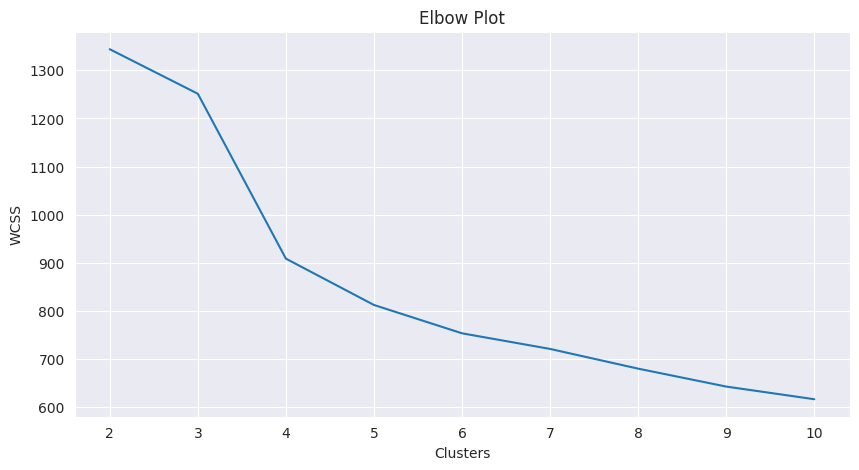

In [ ]:
wcss = []
clusters = range(2, 11)

for c in clusters:
  model = KMeans(n_clusters= c, random_state= 42, n_init= "auto")
  model.fit(scaled)
  wcss.append(model.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(x= clusters, y= wcss)
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("WCSS")

### Observations

From the **Elbow Plot** we found that the elbow is formed at number **4**. So we will use the value to find our clusters with KMeans.

In [ ]:
model = KMeans(n_clusters= 4, random_state=42, n_init= "auto")
model.fit(scaled)
labels = model.labels_

In [ ]:
set(labels)

{0, 1, 2, 3}

In [ ]:
df_labels = pd.DataFrame(labels, columns=["cluster"])
df_final = df_cleaned.reset_index(drop= True)
df_final = pd.concat([df_final, df_labels], axis=1)

In [ ]:
df_final

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,50000,7,1,3,4,1
1,30000,5,1,1,4,3
2,20000,3,0,1,8,0
3,5000,2,0,2,2,0
4,3000,4,0,1,7,0
...,...,...,...,...,...,...
602,34000,6,3,1,0,3
603,47000,4,4,1,0,1
604,38000,4,3,2,0,1
605,39000,7,2,1,0,1


In [ ]:
df_final["cluster"].value_counts().sort_index()

cluster
0     99
1    177
2    123
3    208
Name: count, dtype: int64

### Plot the clusters

Useing scatter plot we will check distribution of each cluster

In [ ]:
X = df_final.iloc[:, :-1].values
y= df_final.iloc[:, -1].values

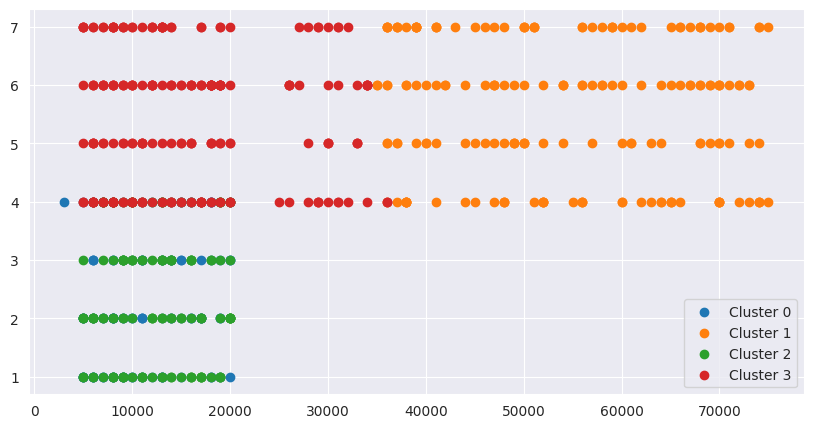

In [ ]:
plt.figure(figsize=(10, 5))
for i in sorted(df_final["cluster"].unique()):
  plt.scatter(X[y == i, 0], X[y == i, 1], label="Cluster " + str(i))
  plt.legend()

## Analyzing Characteristics of the identified clusters

#### Distribution of  Numerical Features with each cluster

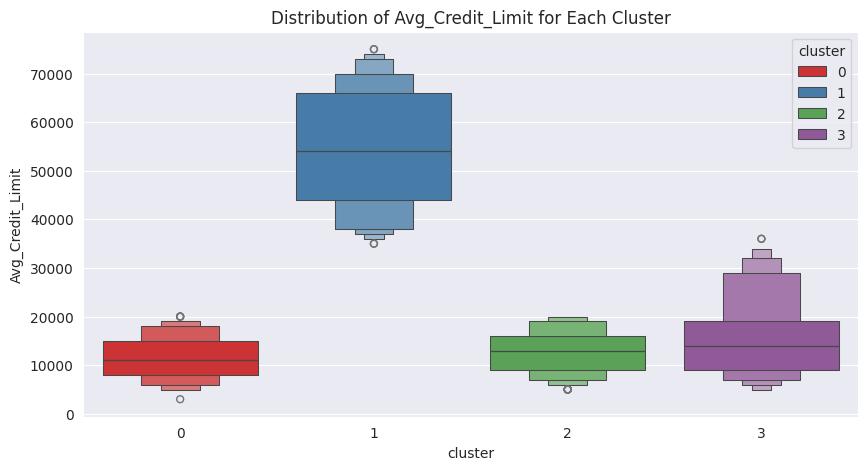

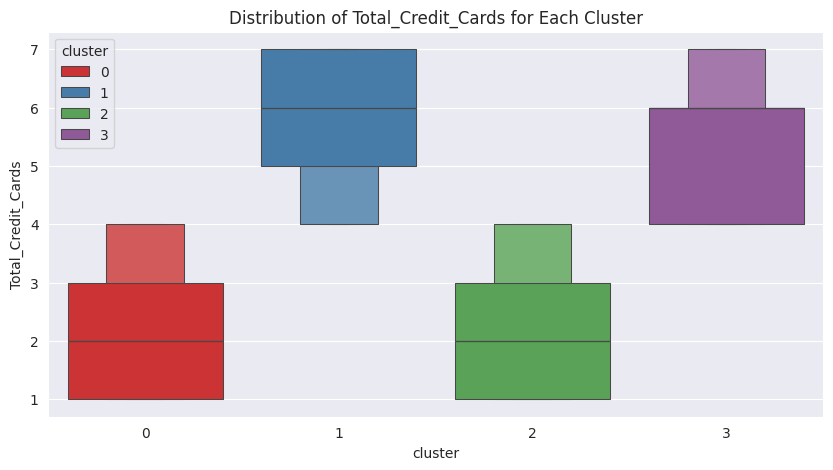

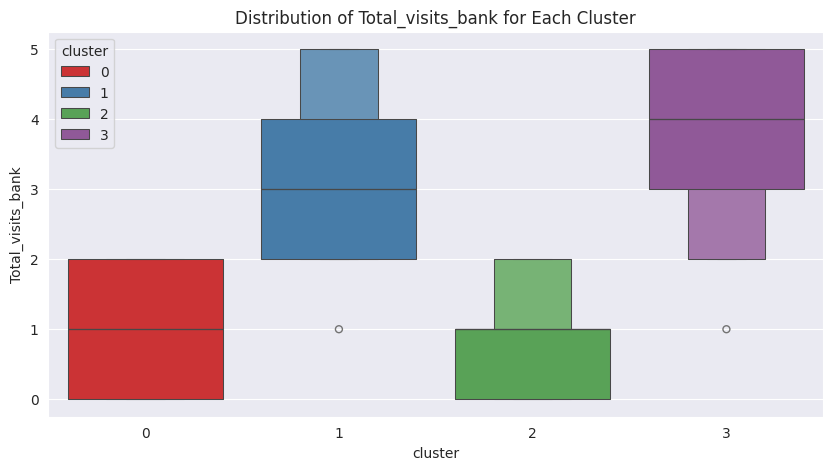

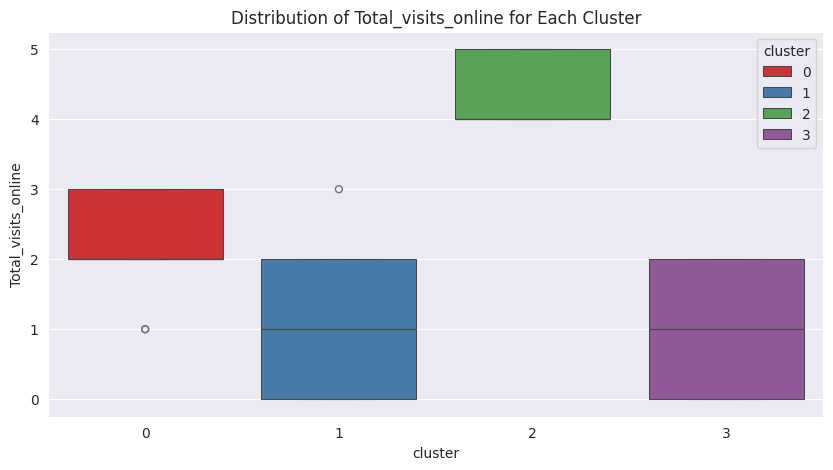

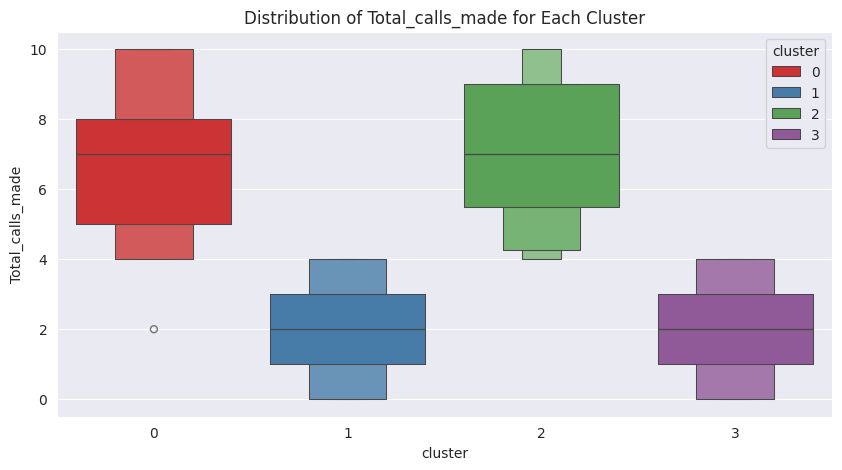

In [ ]:
for col in df_final.columns[:-1]:
  plt.figure(figsize=(10, 5))
  sns.boxenplot(data= df_final,
                x="cluster",
                y=col,
                hue="cluster",
                order=sorted(df_final["cluster"].unique()),
                palette="Set1")
  plt.title(f"Distribution of {col} for Each Cluster")

## Conclutions

* Analyzing the scatter plot for each cluster we can say that **Cluster 1** and **Cluster 3** are separated but **Cluster 0** and **Cluster 2** are overlapped with each other.

**Cluster 0**
* Lower Average Credit Limit.
* Number of Credit Cards 1 to 3.
* Number of times visited bank 0 to 2.
* Number of times visited online banking platform or website 2 to 3.
* Number of times calls the customer support 5 to 8.

**In Short**: *These customers lower credit limit having fewer credit cards. They don't much visit to bank or online platform but they calls customer support much.*

**Cluster 1**
* Highest Average Credit Limit.
* Number of Credit Cards 5 to 7.
* Number of times visited bank 2 to 4.
* Number of times visited online banking platform or website 0 to 2.
* Number of times calls the customer support 2 to 3.

**In Short**: *These customers highest credit limit having many credit cards. Their visit to bank and calls customer support is average but they don't much visit online platform.*


**Cluster 2**
* Lower Average Credit Limit.
* Number of Credit Cards 1 to 3.
* Number of times visited bank 0 to 1.
* Number of times visited online banking platform or website 4 to 5.
* Number of times calls the customer support 5 to 9.

**In Short**: *These customers lower credit limit having fewer credit cards. They very less visit to bank but they use online platform and calls customer support much.*


**Cluster 3**
* Medium Average Credit Limit.
* Number of Credit Cards 4 to 6.
* Number of times visited bank 3 to 5.
* Number of times visited online banking platform or website 0 to 2.
* Number of times calls the customer support 2 to 3.

**In Short**: *These customers average credit limit having many credit cards. Their visit to bank and calls customer support is average but they don't much visit online platform.*

